# Predicting Student Performance in Portuguese Schools
## This Notebook will investigate the correlation between various factors such as home life, parental education, academic absences, and alcohol consumption, and how they can be used to predict a student's grades. The dataset includes complete information from roughly 400 Portuguese students and all factors relevant to their education.
## Data provided by Gabirel Pereira School and Mousinho da Silveira School in Portugal. Accessed via UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/320/student+performance

.

## Import all needed libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LogReg
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Open the CSV data using the "pandas" library.
This will allow us to parse through the data later on.

## Select which factors we want to look at.
I chose to look at which school the student goes to, their gender/sex, their number of absences, and other information as outlined below.

### Data Cleaning - I replaced all categorical/binary data with numbers, and all quantitative data with the "int" equivalent.
### Since the UCI ML Repo specified that there are "No" missing values in this data, there is no need to account for missing or empty data. However, we will still remove any student with a G3 score of 0, because these are outliers that are likely the result of missed tests rather than actual data points.

In [4]:
data = pd.read_csv("Documents/datasets/student+performance/student/student-mat.csv",sep=";") # The CSV file was actually separated by semicolons (;), not commas (,)

# Find zeroes and drop them.
badList = []
count=0
for i in data["G3"]:
    if i == 0:
        badList.append(count)
    count += 1

data = data.drop(badList)
    
data = data.sample(frac=1,random_state=420) # Randomize/shuffle the data.

y = data["G3"]
X=data[["school","sex","absences","internet","schoolsup","Medu","Fedu","health","higher","activities","failures","G2","G1","Dalc","Walc","paid","studytime","Pstatus"]]

X = X.replace({'GP':1,'MS':0,'F':1,'M':0,'U':1,'R':0,'A':0,'T':1,'yes':1,'no':0}) # GP/MS School, Female/Male, Urban/rural (address), Apart/Together (Pstatus), Yes/no for school support / internet

for i in X:
    X = X.astype({i:'int'})

X

,school,sex,absences,internet,schoolsup,Medu,Fedu,health,higher,activities,failures,G2,G1,Dalc,Walc,paid,studytime,Pstatus
219,1,1,4,1,0,2,2,4,1,1,0,10,9,1,1,1,3,1
317,1,1,9,1,0,4,3,5,1,1,0,10,9,1,1,1,3,1
276,1,1,75,1,0,3,2,5,0,0,0,9,10,1,1,0,2,0
347,1,0,0,1,0,4,3,5,1,0,0,10,10,2,3,1,3,1
377,0,1,4,1,0,4,4,2,1,1,0,9,8,3,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,1,18,1,0,2,2,3,1,0,0,6,7,1,2,0,1,1
115,1,0,2,1,0,4,4,5,1,1,0,15,15,1,2,0,2,1
314,1,1,14,1,0,1,1,3,1,0,2,13,15,1,1,0,3,1
63,1,1,2,1,1,4,3,4,1,1,0,9,10,2,4,1,3,1


## Create a new, blank Ridge regression model that will allow us to modify it later on through the Alpha value
Alpha 100 seems to be the best by experimentation.

In [5]:
#model = LogReg()
model = Ridge(alpha=100)

## Define *testing / training / validation* lists for regression analysis. We will be predicting each student's "G3" (grade 3) based on various other factors such as family status, alcohol use, and free time. 

### This will allow us to set up our model, test it, and then validate it later on to account for over/underfitting.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=60)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=60)

## Set up regression data

In [7]:
model.fit(X_train,y_train)

Ridge(alpha=100)

### Calculate the MSE and R2 for our *testing* data

In [8]:
y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)

mse,r2

(0.8542559042772342, 0.917068435592929)

### Now calculate MSE and R2 for our *validation* data

In [9]:
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val,y_pred_val)
r2_val = r2_score(y_val,y_pred_val)

mse_val,r2_val

(0.689377319244279, 0.9345134497001697)

# With R^2 values of 0.917 and 0.934 respectively, both our *testing* and *validation* models are very strong predictors of grades.
### This tells us that our regression analysis was a success, and that we can account for between 91% and 94% of a student's grade by looking at variation in other relevant variables collectively.

# Also, the Mean Squared Error of around 0.69 to 0.85 is fairly good.
## Each grade is out of 20.0, so the MSE is less than 4% of the total grade. This is very good in context, and it means that a student's grade can be predicted almost perfectly.

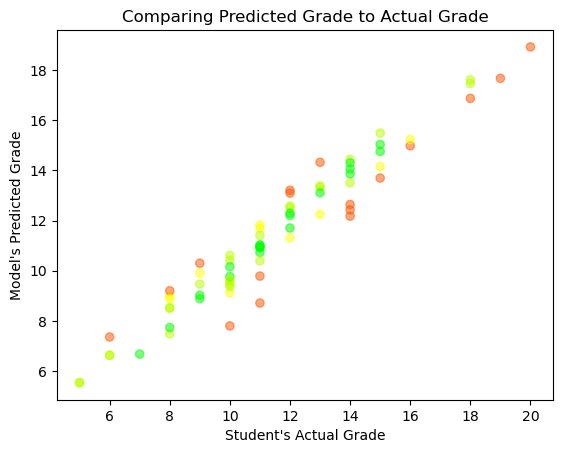

In [25]:
#plt.scatter(data["G2"],data["G3"],alpha=0.1) # Make mostly transparent so overlaying values will become more clear

#plt.xlabel("G2 (Last year's grade)")
#plt.ylabel("G3 (This year's grade)")
#plt.title("Comparing past grades to present grades")

#plt.show()

def colorize(act,pred):
    diff = abs(act-pred)
    if diff>1:
        return "#ff5500"
    elif diff > 0.67:
        return "#ffff00"
    elif diff > 0.33:
        return "#bbff00"
    else:
        return "#00ff00"

colors = [colorize(act,pred) for (act,pred) in zip(y_val,y_pred_val)]

plt.scatter(y_val,y_pred_val,alpha=.5,color=colors) # Make mostly transparent so overlaying values will become more clear

plt.xlabel("Student's Actual Grade")
plt.ylabel("Model's Predicted Grade")
plt.title("Comparing Predicted Grade to Actual Grade")

plt.show()

# The above scatterplot shows the relationship between last year's grade "G2" and this year's grade "G3". As we can see, G2 alone is a fairly good predictor of G3, which is our target variable in this lab.

# The overall takeaway is that there are many factors that can impact a student's educational success, so future attempts to help students succeed should involve addressing each of these statistics hollistically.